## Python Project 
## Tiffany Wibisono
## 03/06/2022

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings('ignore')

In [3]:
mmSales = pd.read_csv('DataProject/MM_Sales.csv')

### Part 1: Cleaning the Data

In [5]:
# Number of rows and columns in the data
print(mmSales.shape)

print('\n')

# Determine what type of datas is in each column
print(mmSales.dtypes)

print('\n')

# Sum the number of missing datas
print(mmSales.isna().sum())

(50000, 14)


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [29]:
# List missing or invalid items on Item Type column

bool_series = pd.isnull(mmSales["Item Type"])
mmSales[bool_series]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
11,Middle East and North Africa,Afghanistan,NaN,Online,C,10/21/16,620358741,12/1/16,6792,437.20,263.33,2969462.40,1788537.36,1180925.04
321,Europe,France,NaN,Online,M,1/23/15,714754474,2/5/15,587,668.27,502.54,392274.49,294990.98,97283.51
14519,Central America and the Caribbean,Nicaragua,NaN,Online,H,2/21/13,391752135,3/28/13,7017,651.21,524.96,4569540.57,3683644.32,885896.25
14520,Australia and Oceania,Vanuatu,NaN,Online,M,6/3/14,282816255,6/23/14,469,154.06,90.93,72254.14,42646.17,29607.97
47186,Europe,Austria,NaN,Offline,L,5/17/11,864141499,5/24/11,7528,81.73,56.67,615263.44,426611.76,188651.68
47188,Europe,Romania,NaN,Online,M,3/31/16,818466699,5/3/16,1339,154.06,90.93,206286.34,121755.27,84531.07


In [30]:
# List missing or inalid items on Order Priority Column

bool_series = pd.isnull(mmSales["Order Priority"])

mmSales[bool_series]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
13,Middle East and North Africa,Lebanon,Vegetables,Offline,NaN,10/15/10,660954082,11/19/10,9855,154.06,90.93,1518261.30,896115.15,622146.15
189,Europe,France,Cosmetics,Online,NaN,8/2/10,670038402,9/16/10,8108,437.20,263.33,3544817.60,2135079.64,1409737.96
259,Central America and the Caribbean,Belize,Fruits,Offline,NaN,11/18/16,238470542,12/2/16,7588,9.33,6.92,70796.04,52508.96,18287.08
364,Sub-Saharan Africa,Angola,Personal Care,Online,NaN,4/21/15,307722604,4/30/15,812,81.73,56.67,66364.76,46016.04,20348.72
469,Asia,Tajikistan,Clothes,Online,NaN,2/26/11,857914912,4/15/11,4942,109.28,35.84,540061.76,177121.28,362940.48
644,Sub-Saharan Africa,Nigeria,Clothes,Online,NaN,7/11/17,468462884,8/4/17,7432,109.28,35.84,812168.96,266362.88,545806.08
784,Sub-Saharan Africa,Lesotho,Meat,Online,NaN,4/27/10,251652848,5/22/10,8525,421.89,364.69,3596612.25,3108982.25,487630.00
924,Middle East and North Africa,United Arab Emirates,Household,Offline,NaN,6/12/17,549222695,6/13/17,6055,668.27,502.54,4046374.85,3042879.70,1003495.15
1064,Middle East and North Africa,Saudi Arabia,Baby Food,Online,NaN,3/1/12,995547425,3/18/12,3461,255.28,159.42,883524.08,551752.62,331771.46
3969,Sub-Saharan Africa,Cape Verde,Fruits,Online,NaN,12/19/15,307628619,2/3/16,2999,9.33,6.92,27980.67,20753.08,7227.59


In [50]:
# Convert Order ID to integer

count = 0
mmSales = mmSales['Order ID'].astype('int')

ValueError: invalid literal for int() with base 10: 'Cosmetics'

In [4]:
# Create a clean copy of our dataframe

mmSalesClean = mmSales.copy()

In [32]:
# Replace missing data

mmSalesClean['Item Type'].fillna('NULL', inplace=True)
mmSalesClean['Order Priority'].fillna('NULL', inplace=True)
mmSalesClean.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [33]:
# Count and list the bad data in Order ID column. Then, replace them with 0

count = 0
for index, row in mmSalesClean.iterrows():
    try:
        # Test if the value is an integer, if it is, its okay
        row.loc['Order ID'] = int(row.loc['Order ID'])
    except:
        # Bad Data
        # Replace any non-integer values with 0
        print(row.loc['Order ID'])
        mmSalesClean.loc[int(index), 'Order ID'] = 0
        print(mmSalesClean.loc[int(index), 'Order ID'])
        count += 1
print(count)

Cosmetics
0
Fruits
0
Snacks
0
Meat
0
Snacks
0
5


In [34]:
# Count and list the bad data in Country column. Then replace them with NULL.

count = 0
for index, row in mmSalesClean.iterrows():
    try:
        # Test if the data is a float, and if it is, it's bad data
        row.loc['Country'] = float(row.loc['Country'])
        print(mmSalesClean.loc[int(index), 'Country'])
        mmSalesClean.loc[int(index), 'Country'] = 'NULL'
        print(mmSalesClean.loc[int(index), 'Country'])
        count += 1
    except:
        1==1

print(count)

154.06
NULL
437.2
NULL
651.21
NULL
3


In [35]:
# Remove rows with bad data
# Rows with bad data are rows that have "NULL" in Item Type, Order Priority, and Country and 0 in Order ID

mmSalesClean = mmSalesClean[mmSalesClean['Item Type'].str.contains('NULL')==False]
mmSalesClean = mmSalesClean[mmSalesClean['Order Priority'].str.contains('NULL')==False]
mmSalesClean = mmSalesClean[mmSalesClean['Country'].str.contains('NULL')==False]
mmSalesClean.drop(mmSalesClean.index[mmSalesClean['Order ID'] == 0], inplace=True)

In [36]:
print(mmSalesClean['Item Type'][mmSalesClean['Item Type'] == 'NULL'].count())

0


In [37]:
print(mmSalesClean['Order Priority'][mmSalesClean['Order Priority'] == 'NULL'].count())

0


In [38]:
print(mmSalesClean['Country'][mmSalesClean['Country'] == 'NULL'].count())

0


In [39]:
print(mmSalesClean['Order ID'][mmSalesClean['Order ID'] == 0].count())

0


In [62]:
mmSalesClean.to_csv('DataProject/MM_Sales_Clean.csv', index=False)

### Part 2: Exploratory Data Analysis with Reports & Visualizations

In [5]:
mmSalesNew = pd.read_csv('DataProject/MM_Sales_Clean.csv', sep=',')

In [41]:
# Information on the new file

print(mmSalesNew.shape)

mmSalesNew.info()

(49971, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49971 entries, 0 to 49970
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          49971 non-null  object 
 1   Country         49971 non-null  object 
 2   Item Type       49971 non-null  object 
 3   Sales Channel   49971 non-null  object 
 4   Order Priority  49971 non-null  object 
 5   Order Date      49971 non-null  object 
 6   Order ID        49971 non-null  int64  
 7   Ship Date       49971 non-null  object 
 8   Units Sold      49971 non-null  int64  
 9   Unit Price      49971 non-null  float64
 10  Unit Cost       49971 non-null  float64
 11  Total Revenue   49971 non-null  float64
 12  Total Cost      49971 non-null  float64
 13  Total Profit    49971 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.3+ MB


#### 1.1

In [122]:
# List the top 10 countries that have the most transactions

countryTop10 = mmSalesNew['Country'].value_counts().head(10)
print(countryTop10)

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


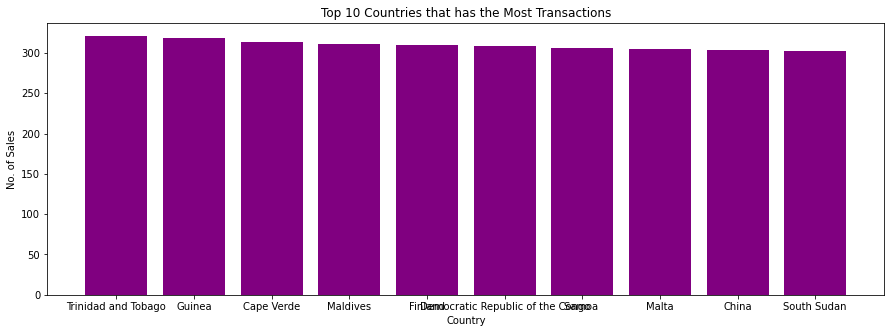

In [43]:
# Bar graph showing top 10 values by country

plt.figure(figsize=(15, 5))
plt.bar(countryTop10.index, countryTop10.values, color='purple')
plt.title('Top 10 Countries that has the Most Transactions')
plt.xlabel('Country')
plt.ylabel('No. of Sales')
plt.show()

#### 1.2 

In [53]:
# Write down the result from 1.1 to a text file using dictionary and for loop

country = mmSalesNew['Country'].value_counts(dropna=False).head(10).keys().tolist()
countryCount = mmSalesNew['Country'].value_counts(dropna=False).head(10).tolist()

top10_dict = dict(zip(country, countryCount))

with open('DataProject/MM_Rankings.txt', 'w+') as mmRankings:
    mmRankings.writelines('Countries Most Sale Transactions:\n')
    for k, v in top10_dict.items():
        mmRankings.writelines(f'{k}: {v}\n')
    mmRankings.writelines('The country we should build our shipping center is Finland because we had 310 transactions'
                      ' from there, and their number of transactions is ranked number five after Maldives.\n')
    

#### 2.1

In [30]:
# Determine how many online and offline orders that our company takes

salesType = mmSalesNew['Sales Channel'].value_counts()
print(salesType)

Online     30183
Offline    19788
Name: Sales Channel, dtype: int64


#### 2.2

In [32]:
# Determine the count of the different Order Priority types

priorityType = mmSalesNew['Order Priority'].value_counts()
print(priorityType)

M    19881
H    15094
L     9984
C     5012
Name: Order Priority, dtype: int64


#### 2.3

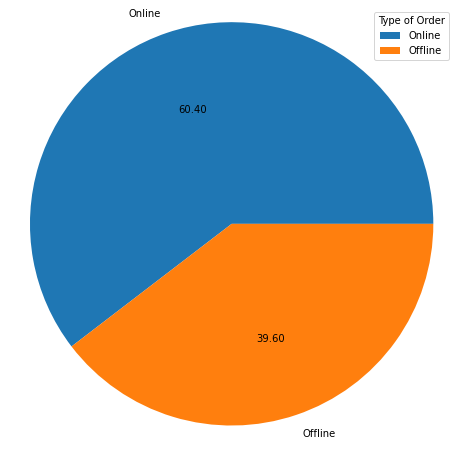

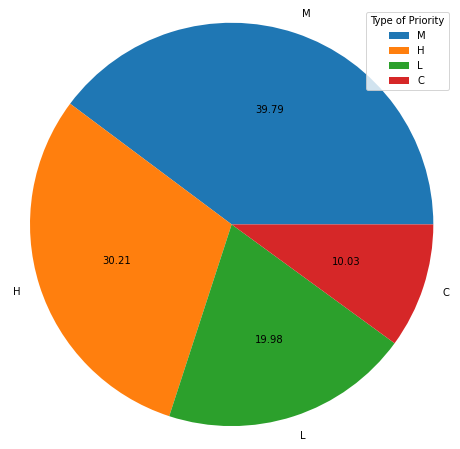

In [54]:
# Create 2 pie charts, 1 for Order Type, and another for Order Priority Type

plt.figure(figsize=(8,8))
plt.pie(salesType, labels=salesType.index, autopct='%.2f')
plt.axis('equal')
plt.legend(loc=1, title='Type of Order')
plt.show()

print('\n')

plt.figure(figsize=(8,8))
plt.pie(priorityType, labels=priorityType.index, autopct='%.2f')
plt.axis('equal')
plt.legend(loc=1, title='Type of Priority')
plt.show()

#### 2.4

In [54]:
# Write down the result from 2.1 and 2.2 to a text file using dictionary and for loop

sales = mmSalesNew['Sales Channel'].value_counts(dropna=False).keys().tolist()
salesCount = mmSalesNew['Sales Channel'].value_counts(dropna=False).tolist()
priority = mmSalesNew['Order Priority'].value_counts(dropna=False).keys().tolist()
priorityCount = mmSalesNew['Order Priority'].value_counts(dropna=False).tolist()
    
salesTypeDict =dict(zip(sales, salesCount))
priorityTypeDict = dict(zip(priority, priorityCount))

with open('DataProject/MM_Rankings.txt', 'a+') as mmRankings:
    mmRankings.writelines('\nSales Channel:\n')
    for k, v in salesTypeDict.items():
        mmRankings.writelines(f'{k}: {v}\n')
    mmRankings.writelines('We do more online sales.\n')
    mmRankings.writelines('\nOrder Priorities\n')
    for k, v in priorityTypeDict.items():
        mmRankings.writelines(f'{k}: {v}\n')
    mmRankings.writelines('We do more M order priorities.\n')                                                      

#### 3.1

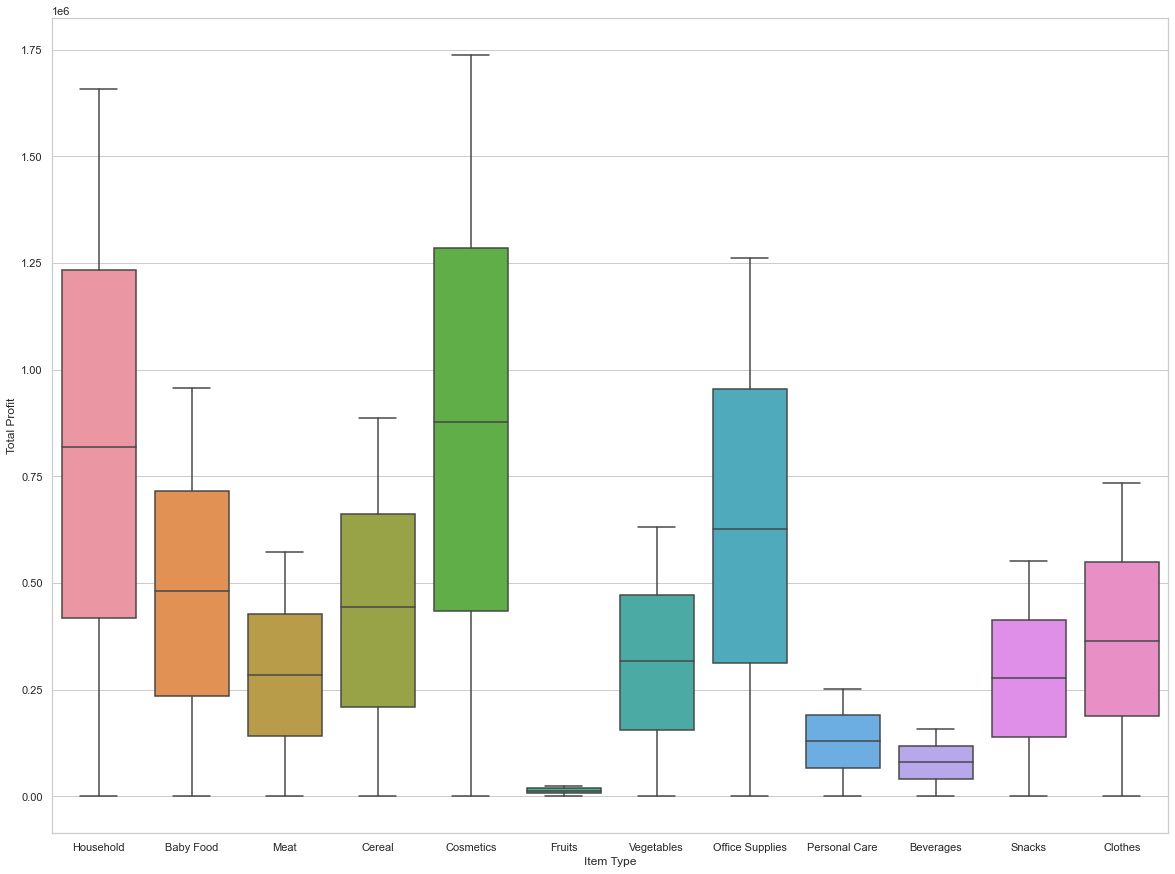

In [68]:
# Boxplot showing the Total Profits distribution by Item Type

sns.set(style='whitegrid')
plt.figure(figsize=(20,15))
ax = sns.boxplot(x=mmSalesNew['Item Type'], y=mmSalesNew['Total Profit'])


#### 3.2

In [47]:
# Total profit earned from each item type

itemProfit = mmSalesNew.groupby(['Item Type'])['Total Profit'].sum()
print(itemProfit)

Item Type
Baby Food         1942865748.12
Beverages          327559249.08
Cereal            1824726412.29
Clothes           1520832019.68
Cosmetics         3638407966.75
Fruits              51010570.92
Household         3401180998.06
Meat              1196342404.40
Office Supplies   2605440187.50
Personal Care      535250525.60
Snacks            1149715758.72
Vegetables        1322639660.24
Name: Total Profit, dtype: float64


#### 3.3

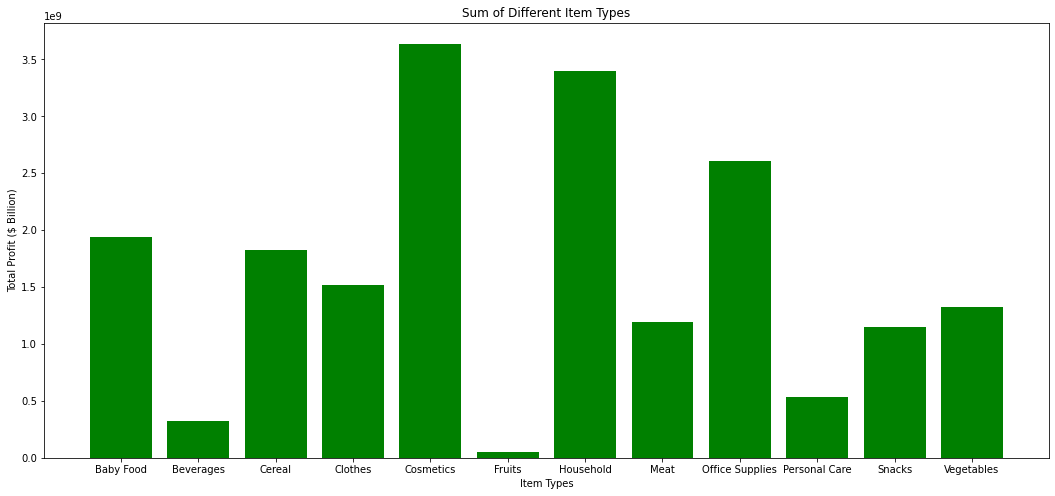

In [48]:
# Bar chart showing the sum of different Item Types

plt.figure(figsize=(18,8))
plt.title('Sum of Different Item Types')
plt.bar(itemProfit.index, itemProfit.values, color='green')
plt.xlabel('Item Types')
plt.ylabel('Total Profit ($ Billion)')
plt.show()

#### 3.4

In [35]:
# List the top 3 most profitable items

itemTop3 = mmSalesNew.groupby(['Item Type'])['Total Profit'].sum().nlargest(3)
print(itemTop3)

Item Type
Cosmetics         3638407966.75
Household         3401180998.06
Office Supplies   2605440187.50
Name: Total Profit, dtype: float64


#### 3.5

In [55]:
# Write down the result from 3.4 to a text file. 

with open('DataProject/MM_Rankings.txt', 'a+') as mmRankings:
    mmRankings.writelines('\n')
    mmRankings.writelines('Highest Selling Items:\n')
    mmRankings.writelines('Item 1: Cosmetics\n')
    mmRankings.writelines('Item 2: Household\n')
    mmRankings.writelines('Item 3: Office Supplies\n')
    mmRankings.writelines('We profited from cosmetics the most.\n')

#### 3.6

In [1]:
'''
The boxplot shows the relationship between the 12 different item types we sell and the total 
profit earned from each item type. From the given result, I can tell that our top 3 profit come from 
items related to Household, Cosmetics, and Office Supplies. On the other hand, we earned the least 
profit from selling Fruits where profit margin is close to 0. Therefore, I would say that the Marvel
Mart should either consider on improving the sales of Fruits, or consider on stopping the sales and 
replace it with other products. In this way, the company would be able to generate more profit.
'''

'\nThe boxplot shows the relationship between the 12 different item types we sell and the total \nprofit earned from each item type. From the given result, I can tell that our top 3 profit come from \nitems related to Household, Cosmetics, and Office Supplies. On the other hand, we earned the least \nprofit from selling Fruits where profit margin is close to 0. Therefore, I would say that the Marvel\nMart should either consider on improving the sales of Fruits, or consider on stopping the sales and \nreplace it with other products. In this way, the company would be able to generate more profit.\n'

#### 4.1

In [95]:
# Get the sum of all values in Units Sold, Unit Cost, Total Revenue, Total Cost, and Total Profit column

print('Sum value of:')
columns1 = ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
sums1 = mmSalesNew[columns1].sum(axis=0)
print(sums1)

Sum value of:
Units Sold        249818150.00
Unit Cost           9360768.32
Total Revenue   66145004417.17
Total Cost      46629032915.81
Total Profit    19515971501.36
dtype: float64


#### 4.2

In [96]:
# Get the average of all values in Units Sold, Unit Cost, Total Revenue, Total Cost, and Total Profit column

print('Average Value of:')
columns1 = ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
avgs1 = mmSalesNew[columns1].mean(axis=0)
print(avgs1)

Average Value of:
Units Sold         4999.26
Unit Cost           187.32
Total Revenue   1323667.82
Total Cost       933121.87
Total Profit     390545.95
dtype: float64


#### 4.3

In [97]:
# Get the maximum of all values in Units Sold, Unit Cost, Total Revenue, Total Cost, and Total Profit column

print('Maximum Value of:')
columns1 = ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
maxs1 = mmSalesNew[columns1].max(axis=0)
print(maxs1)

Maximum Value of:
Units Sold        10000.00
Unit Cost           524.96
Total Revenue   6682031.73
Total Cost      5249075.04
Total Profit    1738178.39
dtype: float64


#### 4.4 

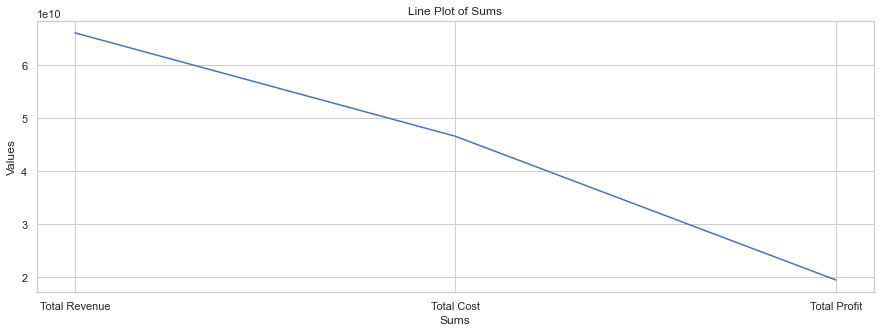

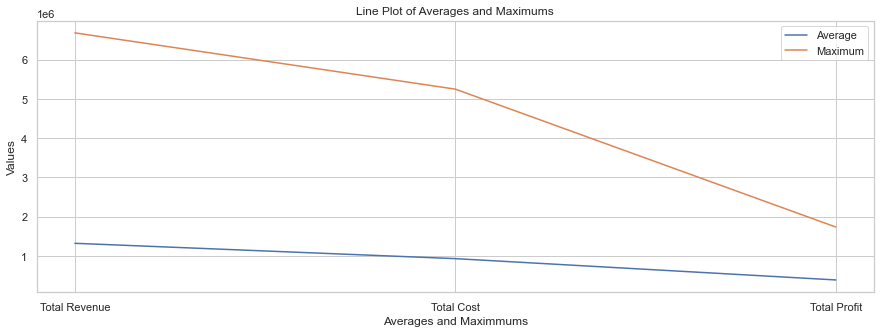

In [90]:
# Create two line plots, 1 for the the Sums, and 1 for the Averages and Maximums

columns2 = ['Total Revenue', 'Total Cost', 'Total Profit']
sums2 = mmSalesNew[columns2].sum(axis=0)
avgs2 = mmSalesNew[columns2].mean(axis=0)
maxs2 = mmSalesNew[columns2].max(axis=0)

plt.figure(figsize=(15,5))
plt.plot(sums2.index, sums2.values)
plt.title('Line Plot of Sums')
plt.xlabel('Sums')
plt.ylabel('Values')
plt.show()

print('\n')

plt.figure(figsize=(15,5))
plt.plot(avgs2.index, avgs2.values, label = 'Average')
plt.plot(maxs2.index, maxs2.values, label='Maximum')
plt.title('Line Plot of Averages and Maximums')
plt.legend()
plt.xlabel('Averages and Maximmums')
plt.ylabel('Values')
plt.show()


#### 4.5

In [117]:
# Write down the results from 4.1-4.3 to a text file using dictionary and for loops

sumDict = dict(zip(columns1, sums1))
avgDict = dict(zip(columns1, avgs1))
maxDict = dict(zip(columns1, maxs1))

with open('DataProject/MM_Calc.txt', 'w+') as mmCalc:
    mmCalc.writelines('Sums:\n')
    for k, v in sumDict.items():
        mmCalc.writelines(f'{k}: {v}\n')   
    mmCalc.writelines('\nAverages:\n')
    for k, v in avgDict.items():
        mmCalc.writelines(f'{k}: {v}\n')  
    mmCalc.writelines('\nMaximums:\n')
    for k, v in maxDict.items():
        mmCalc.writelines(f'{k}: {v}\n')
    

### Part 3: Cross-Reference Statistics

#### 1.1

In [79]:
# List of regions and the countries

region = mmSalesNew.groupby('Region')['Country'].unique()
print(region)

#for k, v in region.items():
    #regionCountry = pd.DataFrame({k: pd.Series(v)})
    #print(regionCountry)

regionCountry = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in region.items()]))
#print(regionCountry)

Region
Asia                                 [Indonesia, India, South Korea, Kazakhstan, Mo...
Australia and Oceania                [Tuvalu, Samoa , Fiji, Marshall Islands, New Z...
Central America and the Caribbean    [Antigua and Barbuda , Saint Kitts and Nevis ,...
Europe                               [Iceland, Russia, Moldova , Malta, Greece, Ukr...
Middle East and North Africa         [Turkey, Iraq, Kuwait, Tunisia , Yemen, United...
North America                        [Greenland, United States of America, Canada, ...
Sub-Saharan Africa                   [Namibia, Djibouti, Cameroon, Nigeria, Senegal...
Name: Country, dtype: object


#### 2.1

In [74]:
# Write to a new CSV file 

regionCountry.to_csv('DataProject/Countries_By_Region.csv', index=False, header=True)